# 2.6 比较、掩码和布尔逻辑

## 2.6.1 示例: 统计下雨天数

In [1]:
import numpy as np
import pandas as pd

# 利用Pandas抽取降雨量, 放入一个NumPy数组
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格

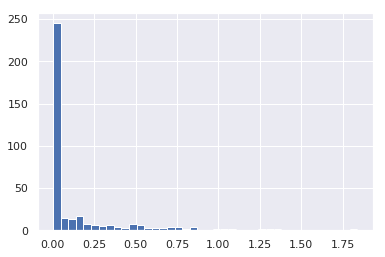

In [3]:
plt.hist(inches, 40);

## 2.6.2 和通用函数类似的比较操作

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [5]:
x < 3

array([ True,  True, False, False, False])

In [6]:
x > 3

array([False, False, False,  True,  True])

In [7]:
x <=3 

array([ True,  True,  True, False, False])

In [8]:
x >= 3

array([False, False,  True,  True,  True])

In [9]:
x != 3

array([ True,  True, False,  True,  True])

In [10]:
x == 3

array([False, False,  True, False, False])

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 2.6.3 操作布尔数组

### 1. 统计记录的个数

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [15]:
# 统计多少值小于6
np.count_nonzero(x < 6)

8

In [16]:
np.sum(x < 6)

8

In [17]:
# 每行多少值小于6
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [18]:
# 有没有值大于8
np.any(x > 8)

True

In [19]:
# 有没有值小于0
np.any(x < 0)

False

In [20]:
# 是否所有都小于10
np.all(x < 10)

True

In [21]:
# 是否所有值都等于6
np.all(x == 6)

False

In [22]:
# 是否每行的所有值都小于8
np.all(x < 8, axis=1)

array([ True, False,  True])

### 2. 布尔运算符

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29

In [24]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [25]:
print('Number days without rain:       ', np.sum(inches == 0))
print('Number days with rain:          ', np.sum(inches != 0))
print('Days with more than 0.5 inches: ', np.sum(inches > 0.5))
print('Rainy days with < 0.2 inches:   ', np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:    75


## 2.6.4 将布尔数组作为掩码

In [26]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [28]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [29]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码(6月21日(172)起90天)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print('Median precip on rainy days in 2014 (inches):            ', np.median(inches[rainy]))
print('Median precip on summer days in 2014 (inches):           ', np.median(inches[summer]))
print('Maximum precip on summer days in 2014 (inches):          ', np.max(inches[summer]))
print('Median precip on non-summer rainy days in 2014 (inches): ', np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):             0.19488188976377951
Median precip on summer days in 2014 (inches):            0.0
Maximum precip on summer days in 2014 (inches):           0.8503937007874016
Median precip on non-summer rainy days in 2014 (inches):  0.20078740157480315


### 使用关键字and/or与使用逻辑操作运算符&/|

In [30]:
bool(42), bool(0)

(True, False)

In [31]:
bool(42 and 0)

False

In [32]:
bool(42 or 0)

True

In [33]:
bin(42)

'0b101010'

In [34]:
bin(59)

'0b111011'

In [35]:
bin(42 & 59)

'0b101010'

In [36]:
bin(42 | 59)

'0b111011'

In [37]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [38]:
# 报错
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

In [39]:
# 报错
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()